In [4]:
import csv

# Define input and output file names
input_file = 'cleaned.txt'
output_file = 'basketball_stats.csv'

# Define the column names
columns = [
    "GP", "GS", "MIN", "FGM", "FGA", "FG%", "3PM", "3PA", "3P%", 
    "FTM", "FTA", "FT%", "OFF", "DEF", "TRB", "AST", "STL", 
    "BLK", "PF", "TOV", "PTS", "YR", "POS", "W", "H", "NAME"
]

# Read the cleaned.txt file and write to a CSV file
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    # Write the header
    writer.writerow(columns)
    
    # Write the data rows
    for line in infile:
        parts = line.strip().split()
        
        # Ensure we have the correct number of columns
        if len(parts) >= 26:  # 24 stats + height + name
            name = ' '.join(parts[25:])  # Join parts from index 25 onwards as the name
            row = parts[:24] + [parts[24], name]  # First 24 elements + height + name
            writer.writerow(row)

print(f'Data has been written to {output_file} successfully.')

Data has been written to basketball_stats.csv successfully.


Naive Bayes Accuracy: 0.6853146853146853
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.81      0.79        21
           2       0.74      0.71      0.72        35
           3       0.52      0.55      0.54        20
           4       0.65      0.46      0.54        28
           5       0.70      0.82      0.75        39

    accuracy                           0.69       143
   macro avg       0.68      0.67      0.67       143
weighted avg       0.68      0.69      0.68       143

SVM Accuracy: 0.24475524475524477
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        20
           4       0.12      0.11      0.11        28
           5       0.27      0.82      0.41        39

    accuracy                           0.24   

C:\Users\fsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

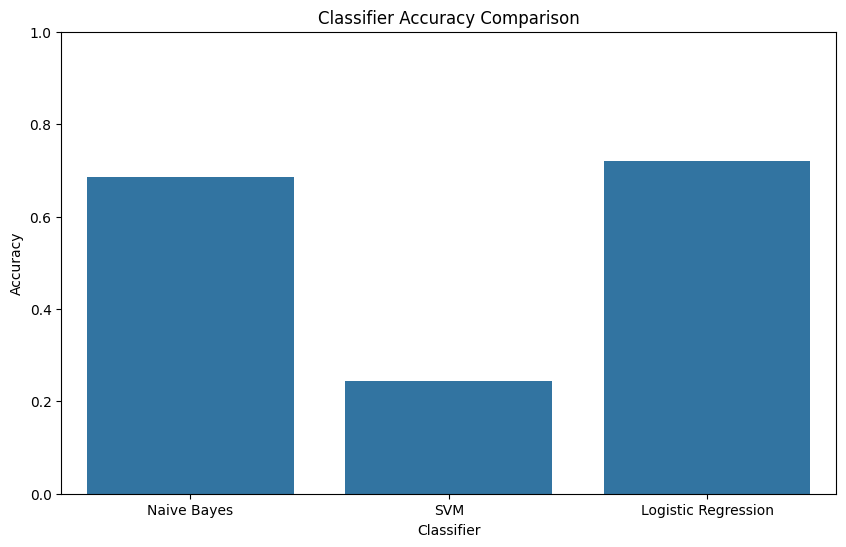

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('basketball_stats.csv')

# Prepare the feature matrix X and target variable y
X = data.drop(['POS', 'NAME'], axis=1)
y = data['POS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
nb = GaussianNB()
svm = SVC()
lr = LogisticRegression(max_iter=1000)

# Train the classifiers
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

# Calculate the accuracy of each classifier
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracy and classification reports
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n",
      classification_report(y_test, nb_pred))
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n",
      classification_report(y_test, svm_pred))
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n",
      classification_report(y_test, lr_pred))

# Create a DataFrame to store the accuracy results
results = pd.DataFrame({
    'Classifier': ['Naive Bayes', 'SVM', 'Logistic Regression'],
    'Accuracy': [nb_accuracy, svm_accuracy, lr_accuracy]
})

# Plot the accuracy results
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


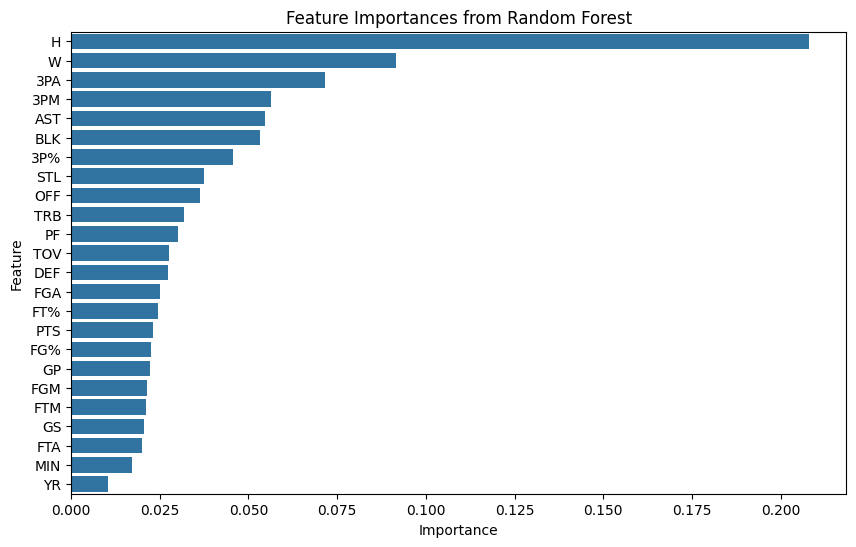

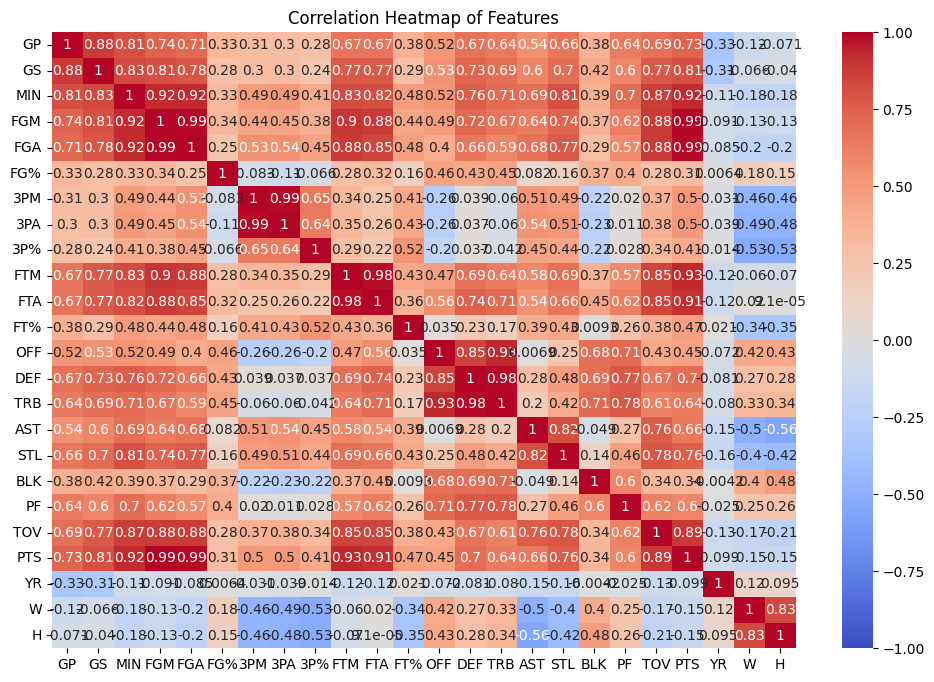

Feature Importances:
Correlation Matrix:


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('basketball_stats.csv')

# Prepare the feature matrix X and target variable y
X = data.drop(['POS', 'NAME'], axis=1)
y = data['POS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

print('Feature Importances:')
# print(feature_importance_df)
print('Correlation Matrix:')
# print(correlation_matrix)

                         H           W       3PA
Power Forward   206.216049  108.895062  0.473025
Center          212.590717  115.481013  0.101308
Point Guard     185.174419   82.290698  1.741395
Small Forward   200.420561   98.084112  1.691308
Shooting Guard  194.325000   90.633333  2.070667


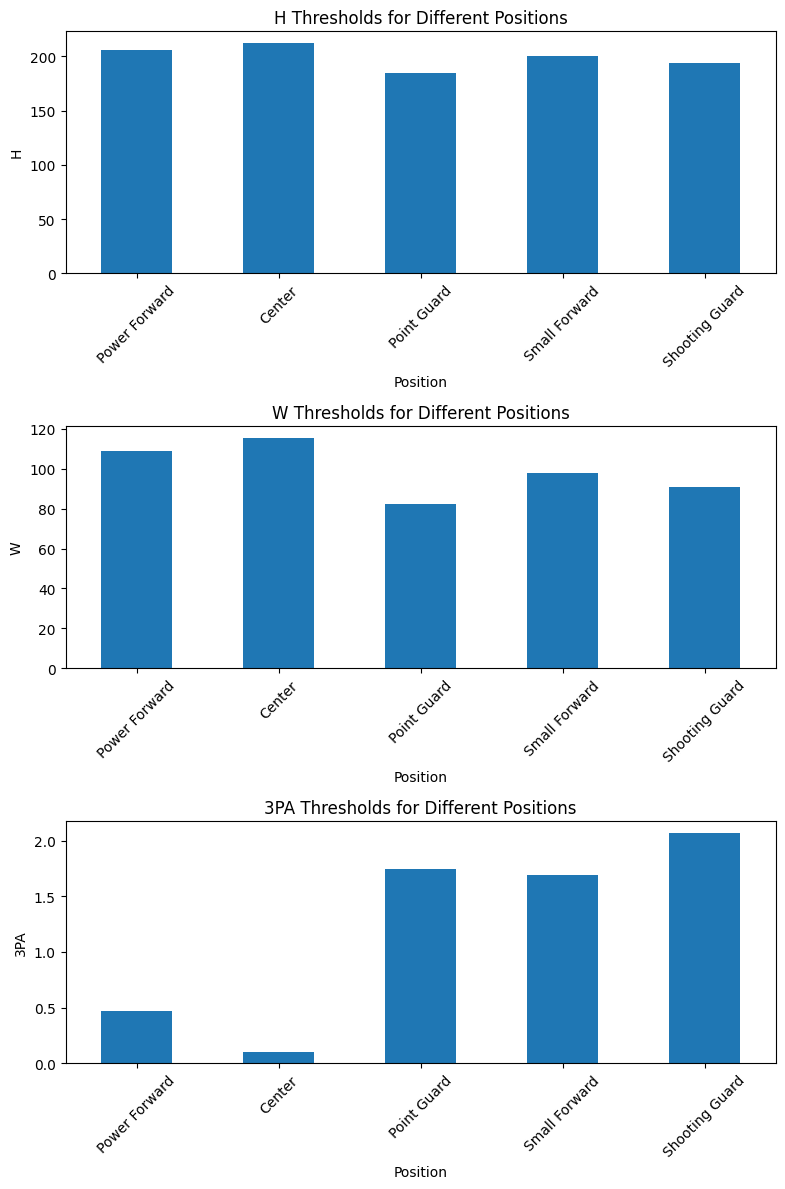

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('basketball_stats.csv')

# Prepare the feature matrix X and target variable y
X = data.drop(['POS', 'NAME'], axis=1)
y = data['POS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False)

# Select features with importance > 0.075
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.07]['Feature'].tolist()

# Create an empty dictionary to store the thresholds for each position and feature
thresholds = {}

# Position codes and their corresponding names
position_names = {1: 'Point Guard', 2: 'Shooting Guard', 3: 'Small Forward', 4: 'Power Forward', 5: 'Center'}

# Calculate the mean of selected features for each position
for position in data['POS'].unique():
    position_data = data[data['POS'] == position]
    thresholds[position_names[position]] = {}
    for feature in selected_features:
        mean_value = position_data[feature].mean()
        thresholds[position_names[position]][feature] = mean_value

# Convert the dictionary to a DataFrame for better display
thresholds_df = pd.DataFrame(thresholds).T

print(thresholds_df)

# Plot each selected feature in a separate bar plot
num_features = len(selected_features)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 4 * num_features))

for i, feature in enumerate(selected_features):
    ax = axes[i] if num_features > 1 else axes
    thresholds_df[feature].plot(kind='bar', ax=ax)
    ax.set_title(f'{feature} Thresholds for Different Positions')
    ax.set_xlabel('Position')
    ax.set_ylabel(feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Naive Bayes Accuracy: 0.7552447552447552
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.77      0.69      0.73        35
           3       0.57      0.80      0.67        20
           4       0.76      0.57      0.65        28
           5       0.82      0.92      0.87        39

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.74       143
weighted avg       0.77      0.76      0.75       143

SVM Accuracy: 0.5454545454545454
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.33      0.50        21
           2       0.57      0.60      0.58        35
           3       0.38      0.40      0.39        20
           4       0.27      0.11      0.15        28
           5       0.58      1.00      0.74        39

    accuracy                           0.55    

C:\Users\fsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


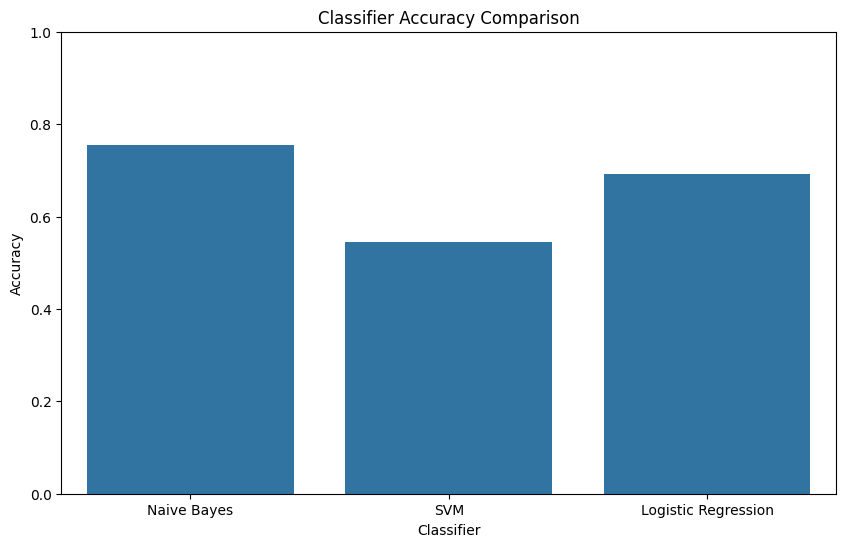

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('basketball_stats.csv')

# Select the relevant features and the target variable
selected_features = ['H', 'W', '3PA']
X = data[selected_features]
y = data['POS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
nb = GaussianNB()
svm = SVC()
lr = LogisticRegression(max_iter=1000)

# Train the classifiers
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

# Calculate the accuracy of each classifier
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracy and classification reports
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n",
      classification_report(y_test, nb_pred))
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n",
      classification_report(y_test, svm_pred))
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n",
      classification_report(y_test, lr_pred))

# Create a DataFrame to store the accuracy results
results = pd.DataFrame({
    'Classifier': ['Naive Bayes', 'SVM', 'Logistic Regression'],
    'Accuracy': [nb_accuracy, svm_accuracy, lr_accuracy]
})

# Plot the accuracy results
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()